# Author: Aarushi Kohli

## Data Science and Business Analytics Intern @ The Sparks Foundation

### Task-3: Exploratory data analysis _ Retail

# Import libraries

In [1]:
import pandas as pd 
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Check the dublicates and nulls

In [4]:
df.duplicated().sum()

17

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Get the information of data 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


# Remove unwanted columns

In [9]:
df['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

In [10]:
df.drop('Country', axis=1, inplace=True)

# Univariant analysis

In [11]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [12]:
dic = ['Sales','Quantity','Discount','Profit']

<Figure size 1440x360 with 0 Axes>

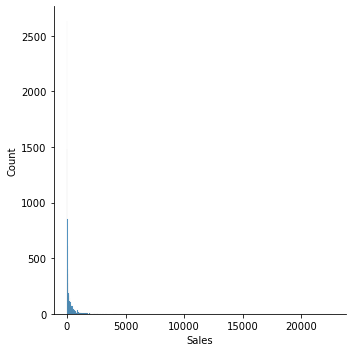

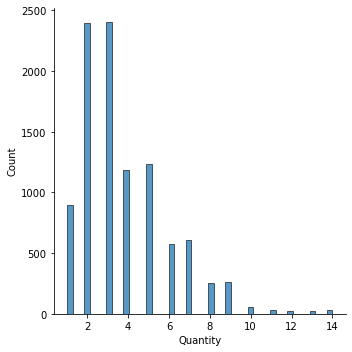

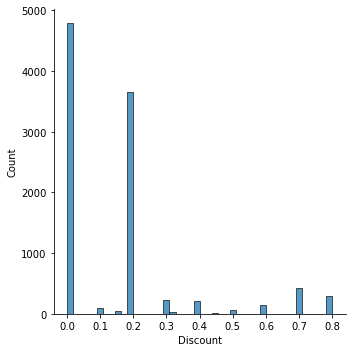

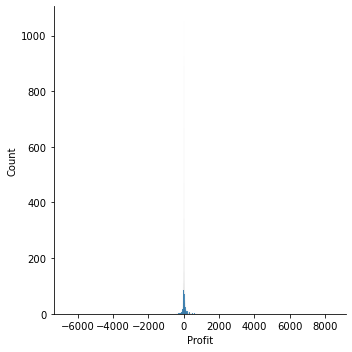

In [13]:
plt.figure(figsize=(20,5))
for col in dic:
    sns.displot(data= df , x=col)

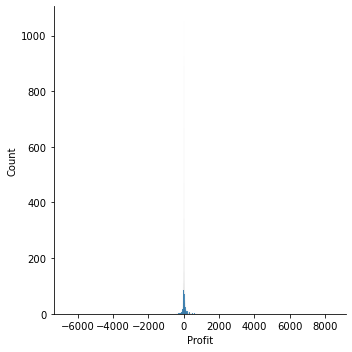

In [14]:
sns.displot(data= df , x='Profit')

# The outliers of discount

<AxesSubplot:xlabel='Discount'>

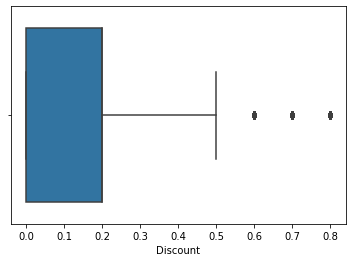

In [15]:
sns.boxplot(data = df , x = 'Discount')

In [16]:
df[df['Profit']==df['Profit'].max()]

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0.0,8399.976


In [17]:
df[df['Profit']==df['Profit'].min()]

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.978


In [18]:
df[(df['Profit']<0)&(df['Sales']>10)]

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
23,Second Class,Consumer,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
36,First Class,Corporate,Richardson,Texas,75080,Central,Furniture,Furnishings,190.9200,5,0.60,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...
9919,Standard Class,Corporate,Bryan,Texas,77803,Central,Furniture,Chairs,528.4300,5,0.30,-143.4310
9920,Standard Class,Corporate,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9931,Standard Class,Consumer,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


# What is the most ship class ordered from our website ?

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

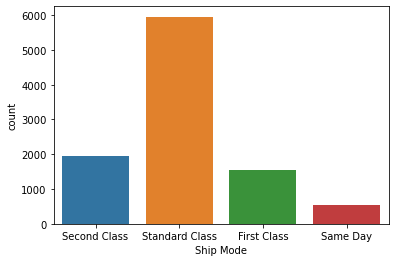

In [19]:
sns.countplot( data=df,x='Ship Mode')

# Which segment make more orders?

In [20]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

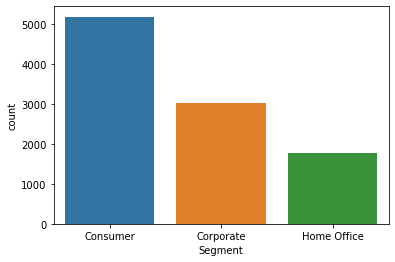

In [21]:
sns.countplot(data = df , x ='Segment')

# The highest profit in which segment?

In [22]:
df.groupby('Segment').sum()['Profit']

Segment
Consumer       134007.4413
Corporate       91954.9798
Home Office     60279.0015
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

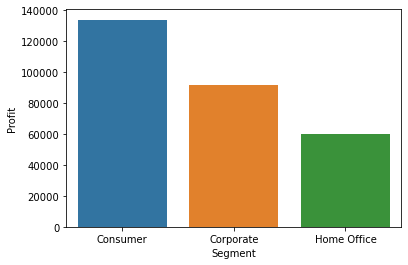

In [23]:
sns.barplot(x=df.groupby('Segment').sum()['Profit'].index,y=df.groupby('Segment').sum()['Profit'])

# The number of orders for each city

In [24]:
df['City'].value_counts()

New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

# What is the most ordered category in our website ?

In [25]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

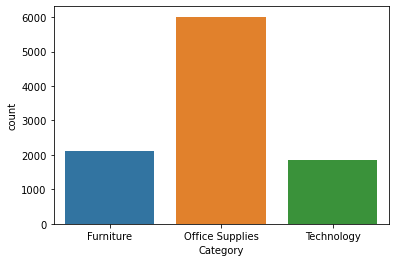

In [26]:
sns.countplot(data = df , x = 'Category')

# What is the most ordered region ?

In [27]:
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

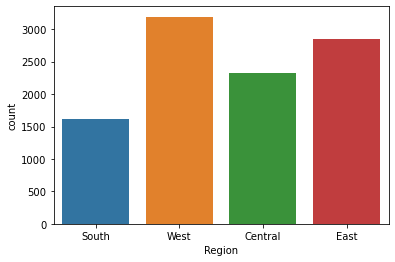

In [28]:
sns.countplot(data = df , x ='Region')

# What is the top 5 ordered state ?

In [29]:
df['State'].value_counts(ascending=True).head()

Wyoming                  1
West Virginia            4
North Dakota             7
Maine                    8
District of Columbia    10
Name: State, dtype: int64

# What is the top 5 products sold ?

In [30]:
df['Sub-Category'].value_counts(ascending=True).head()

Copiers       68
Machines     115
Supplies     190
Fasteners    217
Bookcases    228
Name: Sub-Category, dtype: int64

# Bivariate / Multivariate Analysis

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

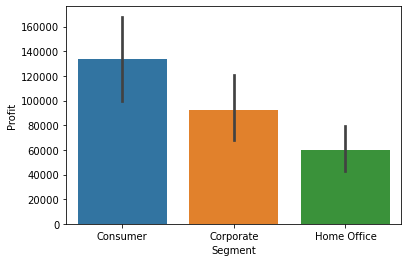

In [31]:
sns.barplot(data = df , x = 'Segment' , y = 'Profit' , estimator=sum)

In [32]:
df.groupby('State').sum()['Profit'].sort_values(ascending = False).head(10)

State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

In [33]:
top_10_state_profit_index = df.groupby('State').sum()['Profit'].sort_values(ascending = False).head(10).index
top_10_state_profit_data = df[df['State'].isin(top_10_state_profit_index)]

<AxesSubplot:xlabel='State', ylabel='Profit'>

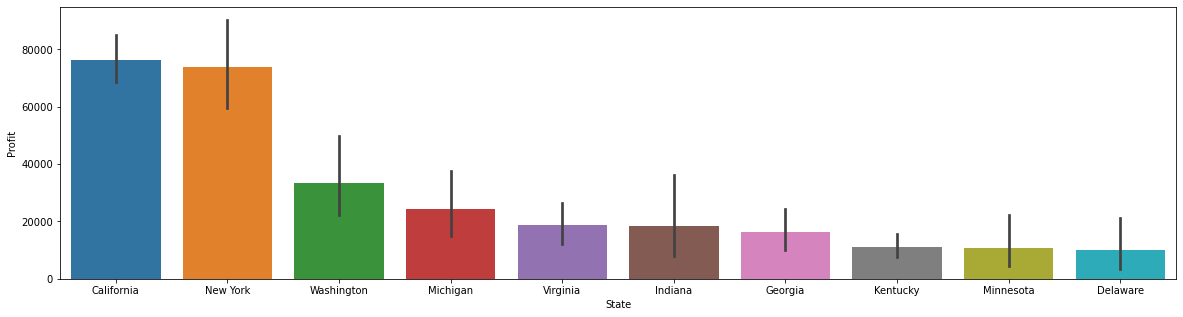

In [34]:
plt.figure(figsize=(20,5))
sns.barplot(data = top_10_state_profit_data , x = 'State' , y = 'Profit' , estimator=sum , order=top_10_state_profit_index)

In [35]:
df.groupby('Category').sum()['Discount'].sort_values(ascending = False)

Category
Office Supplies    946.20
Furniture          368.59
Technology         244.40
Name: Discount, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='Discount'>

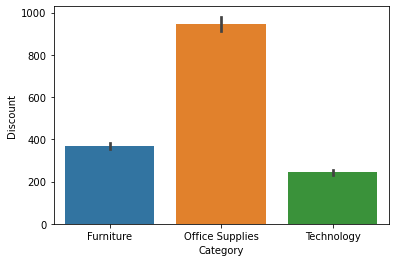

In [36]:
sns.barplot(data = df , x = 'Category' , y = 'Discount' , estimator=sum )

In [37]:
x = pd.pivot_table(data = df , columns= 'Region' , index ='Category' , values ='Sales' , aggfunc=sum)

<AxesSubplot:xlabel='Region', ylabel='Category'>

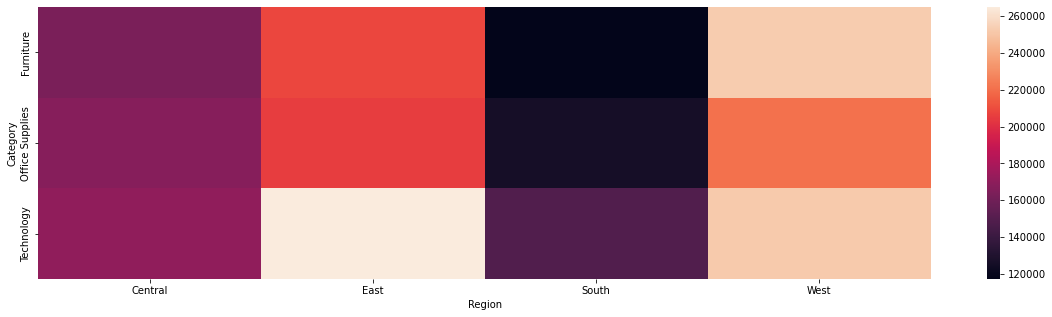

In [38]:
plt.figure(figsize=(20,5))
sns.heatmap(x)

In [39]:
x_1 = pd.pivot_table(data = df , columns= 'Region' , index ='Category' , values ='Profit' , aggfunc=sum)

<AxesSubplot:xlabel='Region', ylabel='Category'>

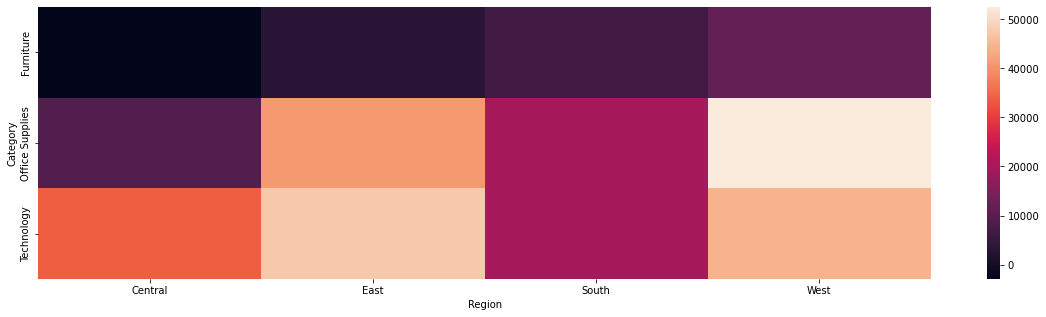

In [40]:
plt.figure(figsize=(20,5))
sns.heatmap(x_1)

In [41]:
x_1 = pd.pivot_table(data = df , columns= 'State' , index ='Category' , values ='Profit' , aggfunc=sum)

<AxesSubplot:xlabel='State', ylabel='Category'>

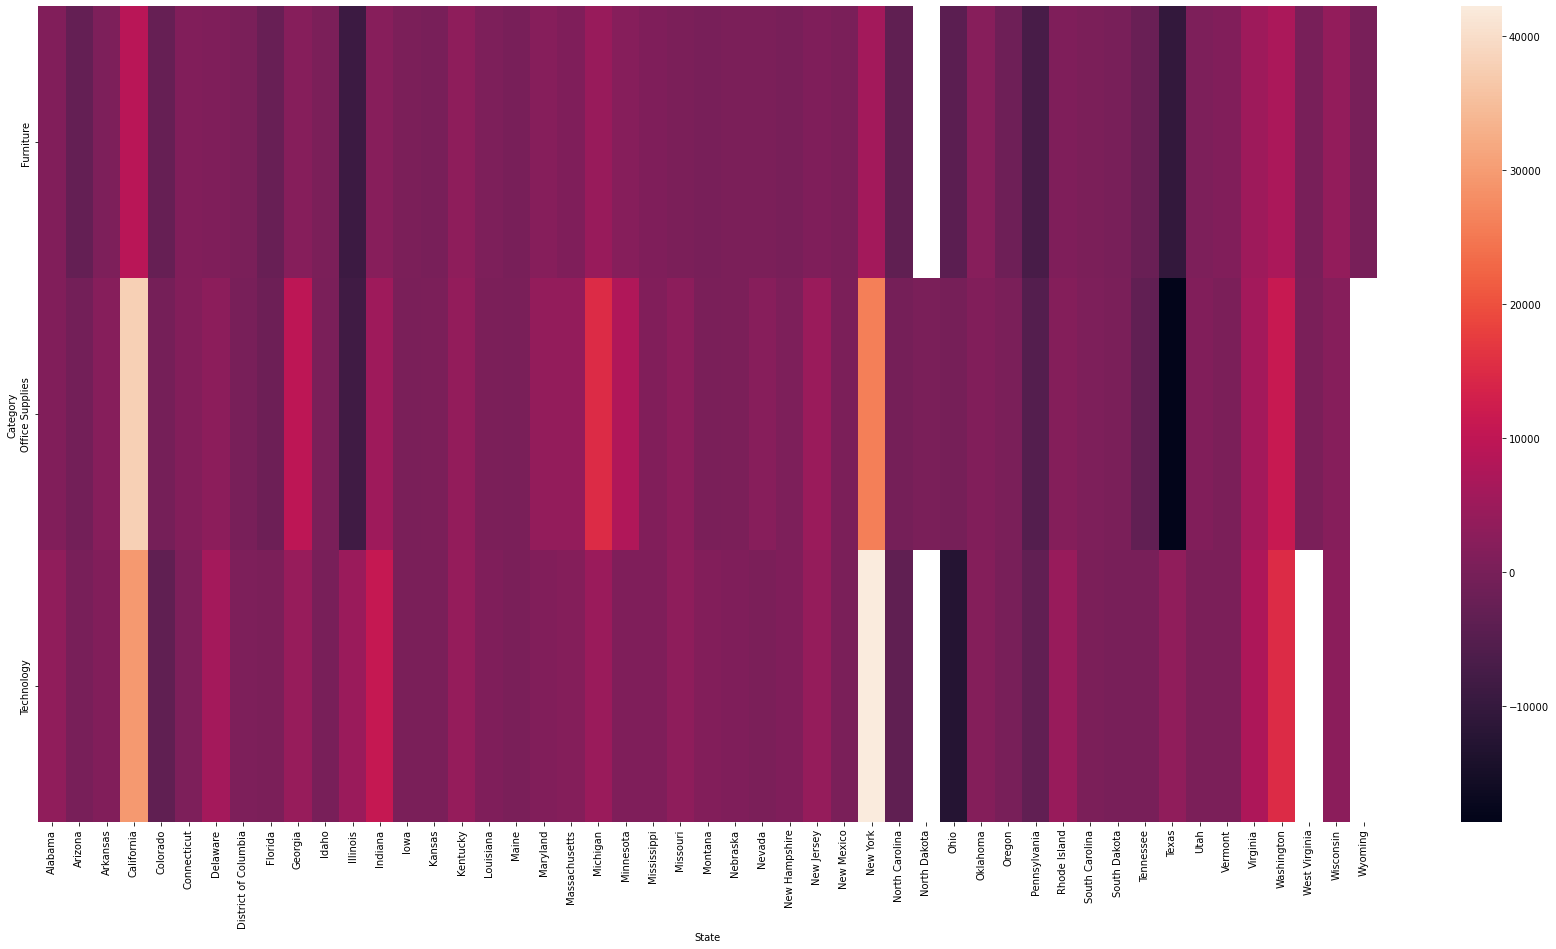

In [42]:
plt.figure(figsize=(30,15))
sns.heatmap(x_1)

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

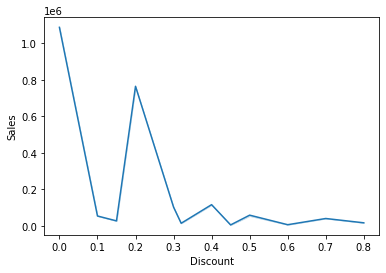

In [43]:
sns.lineplot(data=df, x='Discount', y='Sales', estimator=sum , ci = True)

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

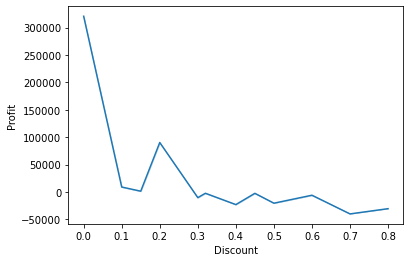

In [44]:
sns.lineplot(data=df, x='Discount', y='Profit', estimator=sum , ci = True)

<AxesSubplot:xlabel='Region', ylabel='Sales'>

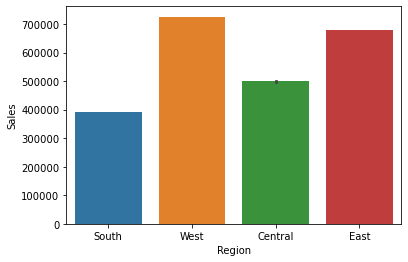

In [45]:
sns.barplot(data = df , x = 'Region' , y = 'Sales'  , estimator=sum , ci=True)

<AxesSubplot:xlabel='Segment', ylabel='count'>

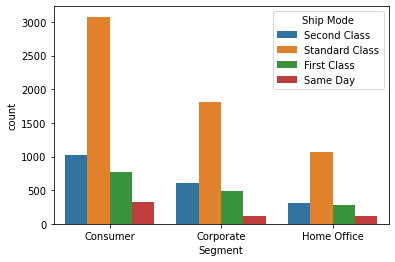

In [46]:
sns.countplot(data=df, x='Segment', hue='Ship Mode')